In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [ ]:
df_tesla=pd.read_csv("/content/TESLA Search Trend vs Price.csv")
df_unemployemt=pd.read_csv("/content/UE Benefits Search vs UE Rate 2004-19.csv")


In [ ]:
df_tesla.shape

(124, 3)

In [ ]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [ ]:
df_tesla['TSLA_WEB_SEARCH'].describe()

,TSLA_WEB_SEARCH
count,124.000000
mean,8.725806
std,5.870332
min,2.000000
25%,3.750000
50%,8.000000
75%,12.000000
max,31.000000


In [ ]:
df_tesla.head() #shows that data is counted daily

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
df_unemployemt.shape

(181, 3)

In [ ]:
df_unemployemt.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [ ]:
df_unemployemt['UE_BENEFITS_WEB_SEARCH'].describe() #shows different values such as minimum max values std mean iqr etc

,UE_BENEFITS_WEB_SEARCH
count,181.000000
mean,35.110497
std,20.484925
min,14.000000
25%,21.000000
50%,26.000000
75%,45.000000
max,100.000000


In [ ]:
df_unemployemt.head() #shows that data is updated monthly

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
df_bitcoin_daily=pd.read_csv("/content/Daily Bitcoin Price.csv")
df_bitcoin_price=pd.read_csv("/content/Daily Bitcoin Price.csv")
df_bitcoin_searches=pd.read_csv("/content/Bitcoin Search Trend.csv")


In [ ]:
df_tesla.isna().values.any()

np.False_

In [ ]:
df_unemployemt.values.any()
df_unemployemt.dropna(inplace=True)

In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_bitcoin_daily.DATE = pd.to_datetime(df_bitcoin_daily.DATE)
df_unemployemt.MONTH = pd.to_datetime(df_unemployemt.MONTH)
df_bitcoin_price.DATE = pd.to_datetime(df_bitcoin_price.DATE)

In [ ]:
df_btc_monthly = df_bitcoin_price.resample('M', on='DATE').last() # makes new dataframe with df_bitcion prices data collected from last day of every month

/tmp/ipython-input-3778195749.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_bitcoin_price.resample('M', on='DATE').last()


In [ ]:
df_btc_monthly.head()

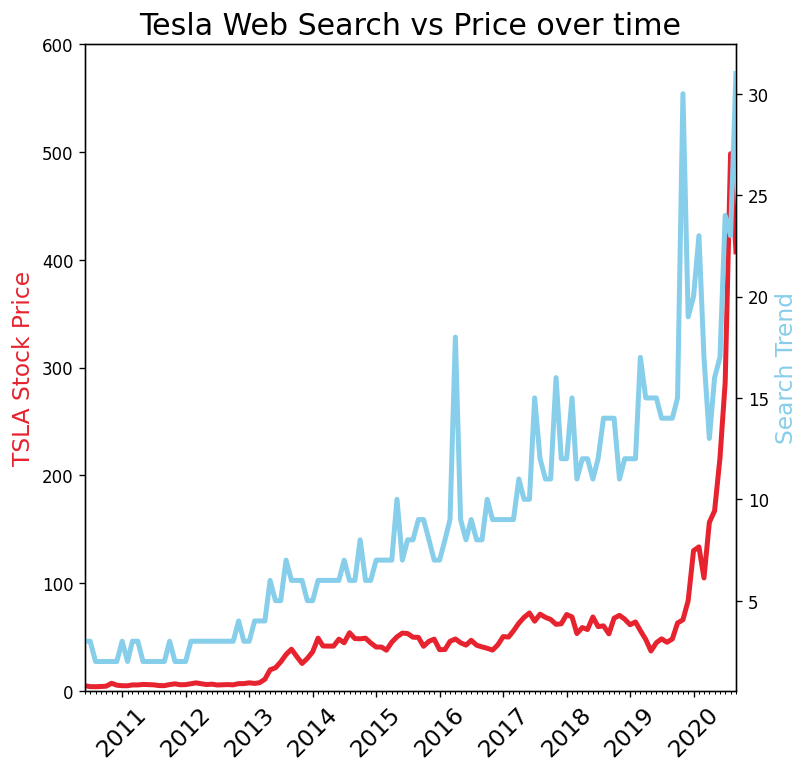

In [ ]:
plt.figure(figsize=(7,7),dpi=120)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.title('Tesla Web Search vs Price over time',fontsize=18)
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14) # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14) # or a named colour

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E',linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue',linewidth=3)
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])


years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

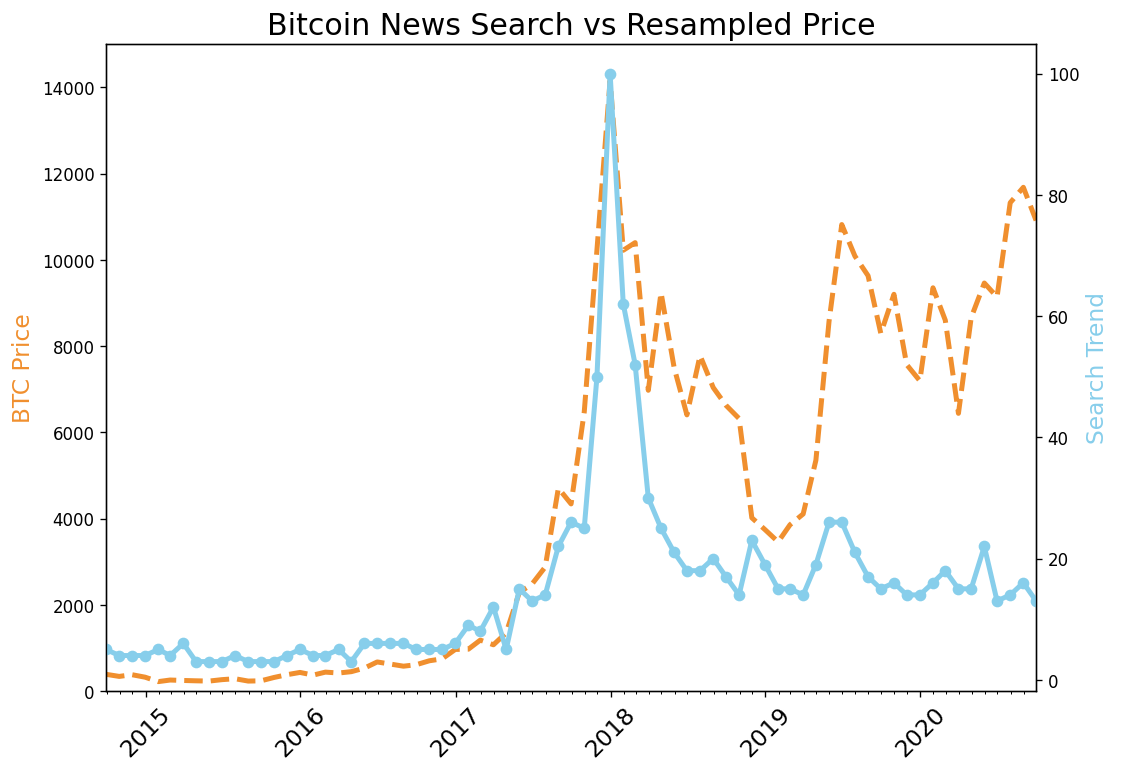

In [ ]:
plt.figure(figsize=(10,7),dpi=120)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.title('Bitcoin News Search vs Resampled Price',fontsize=18)
ax1.set_ylabel( 'BTC Price', fontsize=14,color='#F08F2E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14) # or a named colour

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_bitcoin_searches.BTC_NEWS_SEARCH, color='skyblue',linewidth=3,marker="o")
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])


years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

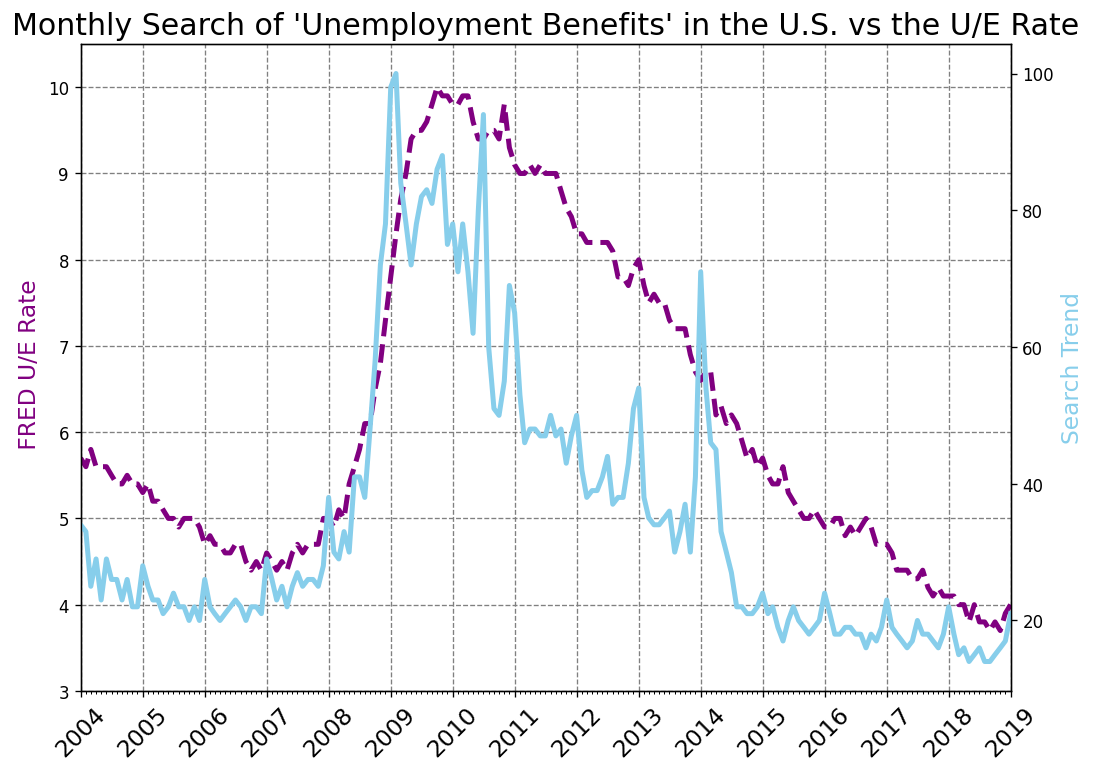

In [ ]:
plt.figure(figsize=(10,7),dpi=120)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate"
,fontsize=18)
ax1.set_ylabel( ' FRED U/E Rate', fontsize=14,color='purple')
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)


ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployemt.MONTH.min(), df_unemployemt.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

ax1.plot(df_unemployemt.MONTH, df_unemployemt.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployemt.MONTH, df_unemployemt.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

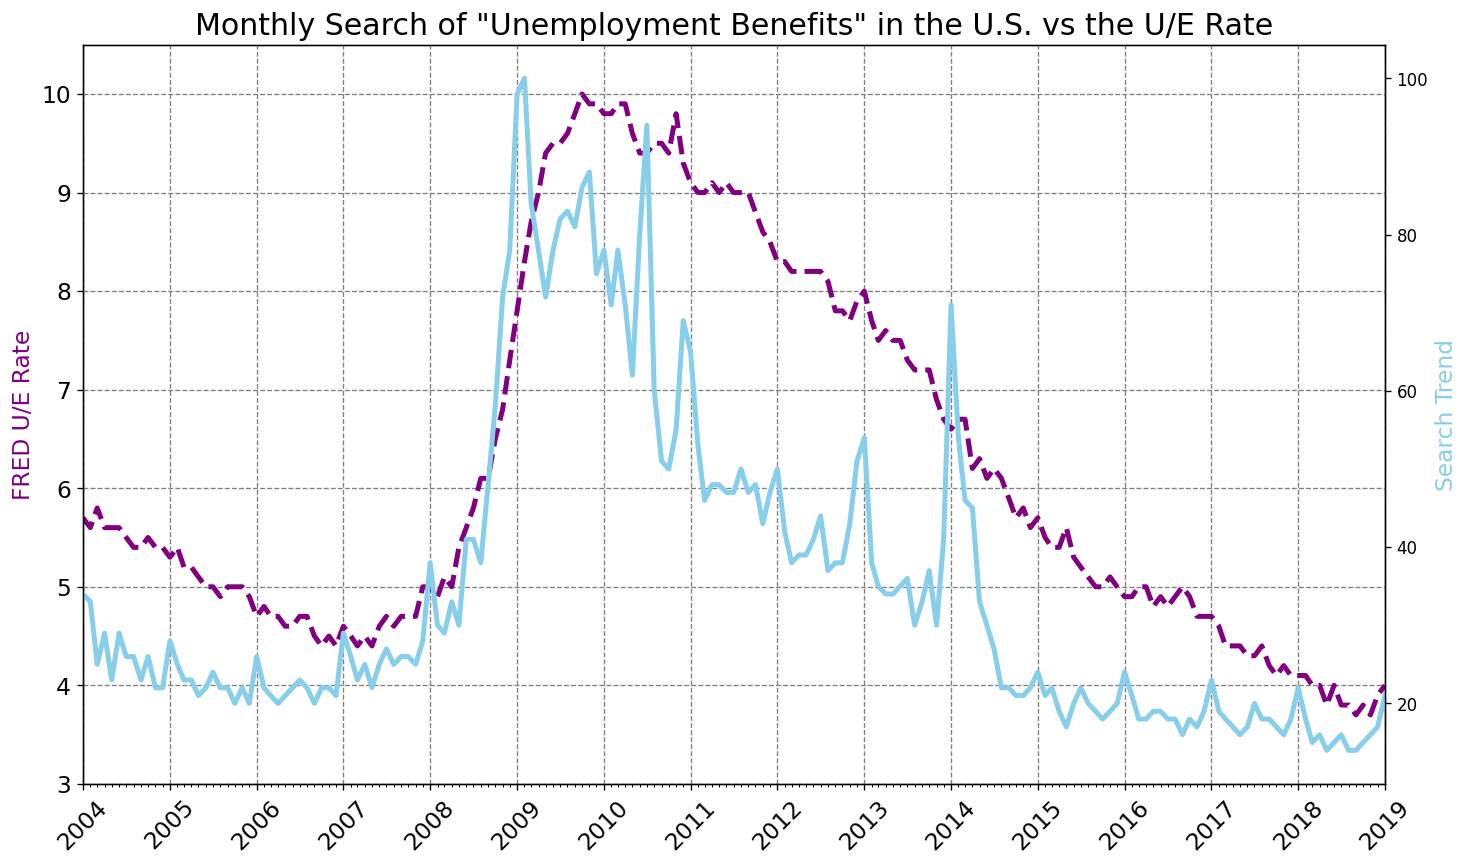

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployemt.MONTH.min(), df_unemployemt.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_unemployemt.MONTH, df_unemployemt.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployemt.MONTH, df_unemployemt.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

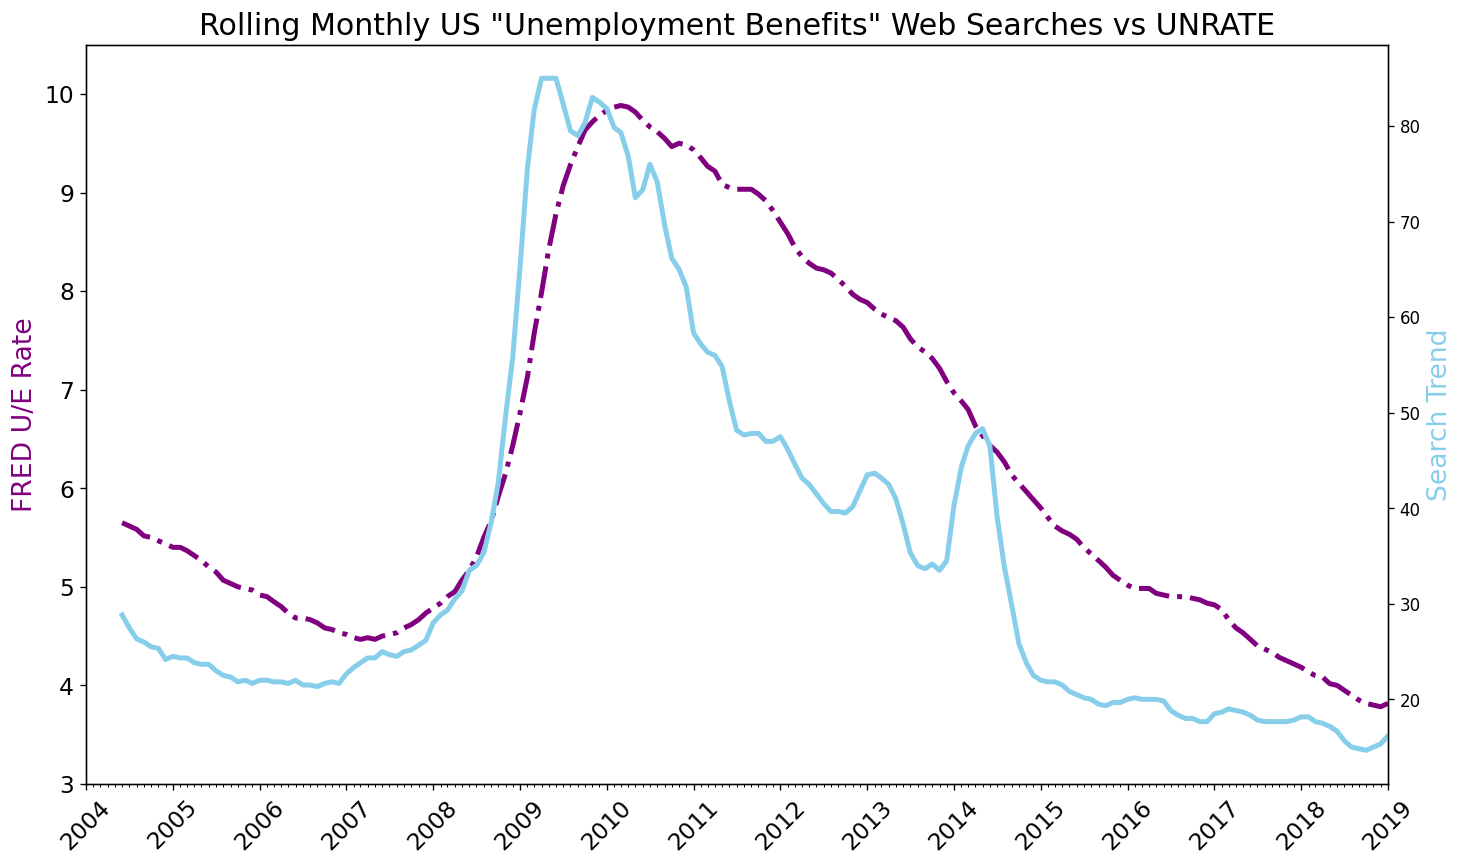

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployemt.MONTH[0], df_unemployemt.MONTH.max()])

# Calculate the rolling average over a 6 month window
roll_df = df_unemployemt[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployemt.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployemt.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

In [ ]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

NameError: name 'pd' is not defined